In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.shape

(555719, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Unnamed: 0,0.0
zip,0.0
merch_long,0.0
merch_lat,0.0
unix_time,0.0
trans_num,0.0
dob,0.0
job,0.0
city_pop,0.0
long,0.0


In [ ]:
classes = df['is_fraud'].value_counts()
classes

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [ ]:
normal_share = round((classes[0]/df['is_fraud'].count()*100),2)
normal_share

99.61

In [ ]:
fraud_share = round((classes[1]/df['is_fraud'].count()*100),2)
fraud_share

0.39

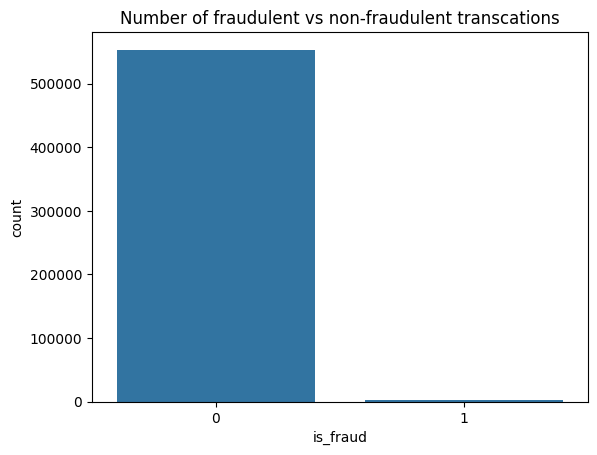

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='is_fraud', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

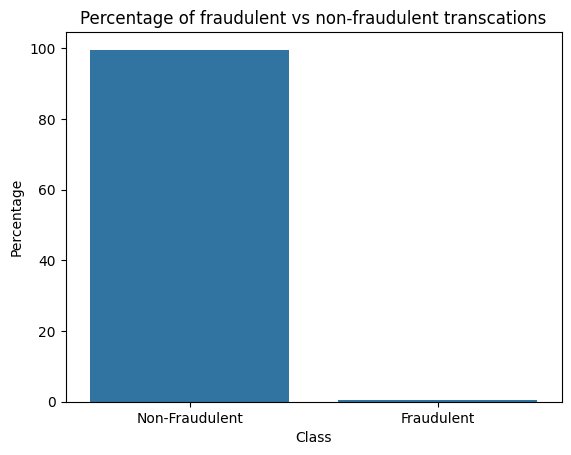

In [ ]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [ ]:
# Creating fraudulent dataframe
data_fraud = df[df['is_fraud'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['is_fraud'] == 0]

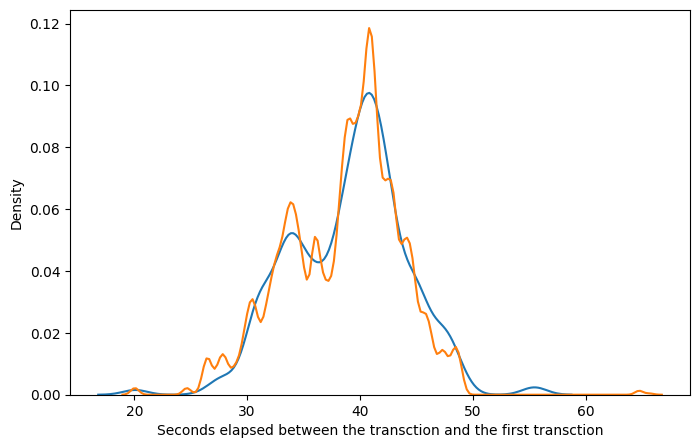

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['lat'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['lat'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [ ]:
# Dropping the Time column
df.drop('lat', axis=1, inplace=True)

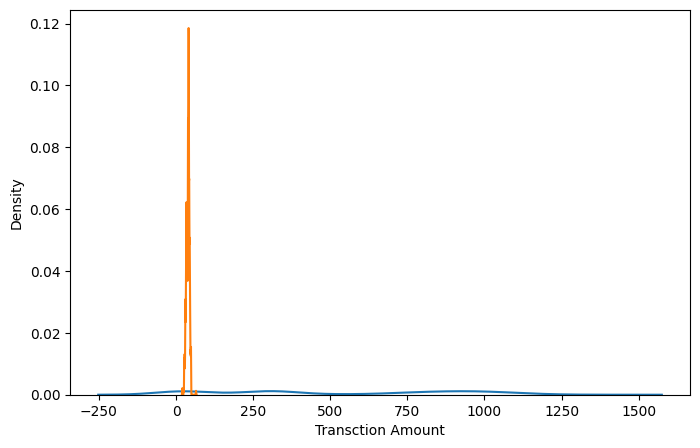

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['amt'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['lat'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()


In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = df.drop(['is_fraud'], axis=1)

In [ ]:
# Putting target variable to y
y = df['is_fraud']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform
X_train['amt'] = scaler.fit_transform(X_train[['amt']])

In [ ]:
X_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
350332,350332,2020-11-03 09:14:19,343746486082492,fraud_Cole PLC,grocery_pos,-0.039606,Jeffrey,Munoz,M,836 Stephanie Union,Cedar,MI,49621,-85.8138,3096,"Social research officer, government",1975-10-11,160ae3e402bfda497021da406b24db1c,1383470059,45.573817,-85.872082
549293,549293,2020-12-29 23:55:09,4861310130652566408,fraud_Rolfson-Kunde,personal_care,-0.185985,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,LA,70774,-90.8435,10076,"Surveyor, rural practice",1977-12-16,099024276f3f1e27dc37895e57205037,1388361309,31.161526,-91.579811
30212,30212,2020-07-01 02:29:58,6011724471098086,fraud_Corwin-Gorczany,misc_net,-0.404007,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,-118.9017,3684,Musician,1981-11-29,a8b4ef8cd75c8f6fd2daaf2d6c60be4c,1372645798,46.539383,-118.017496
498338,498338,2020-12-19 15:55:08,6544734391390261,fraud_Leffler-Goldner,personal_care,-0.409548,John,Myers,M,701 Wilson Divide,Highland,IN,46322,-87.4569,23727,Community arts worker,1982-02-08,65ad12e4d4f73404dd497e993344c5e2,1387468508,40.831292,-86.704994
494511,494511,2020-12-18 15:29:13,4377338765909719,fraud_Howe Ltd,misc_pos,-0.274765,Nicholas,Mcmahon,M,2123 Jonathan Falls Suite 753,Heiskell,TN,37754,-84.0438,4729,"Geologist, wellsite",1982-04-19,90fb9f51c123da5d7d75aa54595ce887,1387380553,36.946773,-83.200237


In [ ]:
# Transform the test set
X_test['amt'] = scaler.transform(X_test[['amt']])
X_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
92076,92076,2020-07-23 04:32:11,342952484382519,fraud_Huels-Nolan,gas_transport,-0.169556,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,CT,6024,-73.2913,647,Comptroller,1987-09-26,6860f3ad8eed613ea3d6f7ee34833ecd,1374553931,41.263097,-72.305677
398408,398408,2020-11-24 12:18:13,2291163933867244,fraud_Hills-Boyer,personal_care,-0.370956,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,-80.9355,333497,Mechanical engineer,1968-03-19,45c44575d1bb7bccd5fb71dcecf80919,1385295493,33.337963,-80.179616
71700,71700,2020-07-15 21:58:02,3533742182628021,fraud_Pacocha-Weissnat,kids_pets,0.496817,Robert,Haynes,M,857 Aaron Circles Suite 398,Johns Island,SC,29455,-79.8217,20478,Materials engineer,1997-06-04,149815bc09769608afbbd01b19f8c5fd,1373925482,32.702182,-79.111622
273212,273212,2020-09-30 10:40:53,3564182536169293,fraud_Kris-Weimann,misc_net,-0.407679,Brenda,Johnson,F,56160 Nicholas Isle,Norwich,OH,43767,-81.8024,1443,Research scientist (medical),1962-03-04,7753b0cb41b44c00d763971b2a878b9d,1380537653,40.341602,-82.256718
200186,200186,2020-08-30 21:49:17,180031190491743,fraud_Erdman-Durgan,health_fitness,-0.270062,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,72f9079aafb91f3a1c59fd56fb7968c7,1377899357,29.885295,-88.075003


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Check for NaN values in y_train
nan_indices = np.isnan(y_train)
if np.any(nan_indices):
    # Remove NaN values from both X_train and y_train
    X_train = X_train[~nan_indices]
    y_train = y_train[~nan_indices]

In [ ]:
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

# Option 2: Impute missing values
# Option 2: Impute missing values
from sklearn.impute import SimpleImputer

In [ ]:
n_neighbors = 3
if n_neighbors > y_train.value_counts().min():
    print("Number of neighbors exceeds the number of samples in the minority class.")
n_neighbors = y_train.value_counts().min() - 1

In [ ]:
numeric_cols = X_train.select_dtypes(include=['number']).columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns


In [ ]:
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = pd.DataFrame(imputer_numeric.fit_transform(X_train[numeric_cols]), columns=numeric_cols, index=X_train.index)


In [ ]:
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
X_train_non_numeric = pd.DataFrame(imputer_non_numeric.fit_transform(X_train[non_numeric_cols]), columns=non_numeric_cols, index=X_train.index)


In [ ]:
X_train_imputed = pd.concat([X_train_numeric, X_train_non_numeric], axis=1)


In [ ]:
columns_to_drop = ['merchant', 'category', 'first', 'last',
                   'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

In [ ]:
X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)


In [ ]:
print(X_train)

        Unnamed: 0 trans_date_trans_time               cc_num       amt  \
350332      350332   2020-11-03 09:14:19      343746486082492 -0.039606   
549293      549293   2020-12-29 23:55:09  4861310130652566408 -0.185985   
30212        30212   2020-07-01 02:29:58     6011724471098086 -0.404007   
498338      498338   2020-12-19 15:55:08     6544734391390261 -0.409548   
494511      494511   2020-12-18 15:29:13     4377338765909719 -0.274765   
...            ...                   ...                  ...       ...   
344414      344414   2020-11-01 10:24:04        4149635823017  0.325311   
212912      212912   2020-09-04 16:23:36       36153880429415  0.068246   
65615        65615   2020-07-13 21:16:35         503848303379  0.517949   
210755      210755   2020-09-03 12:45:06     3573030041201292 -0.409483   
56088        56088   2020-07-10 21:24:24       30487648872433 -0.285847   

          zip      long  city_pop   unix_time  merch_lat  merch_long  
350332  49621  -85.8138     

In [ ]:
n_neighbors = 3
if n_neighbors > y_train.value_counts().min():
    print("Number of neighbors exceeds the number of samples in the minority class.")
n_neighbors = y_train.value_counts().min() - 1

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=2, shuffle=True, random_state=4)

In [ ]:
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
# Specifying score as roc-auc
model_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=params, scoring='roc_auc', cv=folds, verbose=1, return_train_score=True)


In [ ]:
# Fit the model
model_cv.fit(X_train_smote, y_train_smote)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.679318,0.055517,0.248853,0.010816,0.01,{'C': 0.01},0.48069,0.482154,0.481422,0.000732,1,0.482153,0.48069,0.481422,0.000732
1,0.627793,0.001742,0.238638,0.001531,0.1,{'C': 0.1},0.48069,0.482154,0.481422,0.000732,1,0.482153,0.48069,0.481422,0.000732
2,0.896304,0.277713,0.263560,0.025233,1,{'C': 1},0.48069,0.482154,0.481422,0.000732,1,0.482153,0.48069,0.481422,0.000732
3,1.868714,0.408051,1.072424,0.147946,10,{'C': 10},0.48069,0.482154,0.481422,0.000732,1,0.482153,0.48069,0.481422,0.000732
4,1.172658,0.042598,0.534495,0.128084,100,{'C': 100},0.48069,0.482154,0.481422,0.000732,1,0.482153,0.48069,0.481422,0.000732
5,0.604118,0.011295,0.245212,0.000657,1000,{'C': 1000},0.48069,0.482154,0.481422,0.000732,1,0.482153,0.48069,0.481422,0.000732


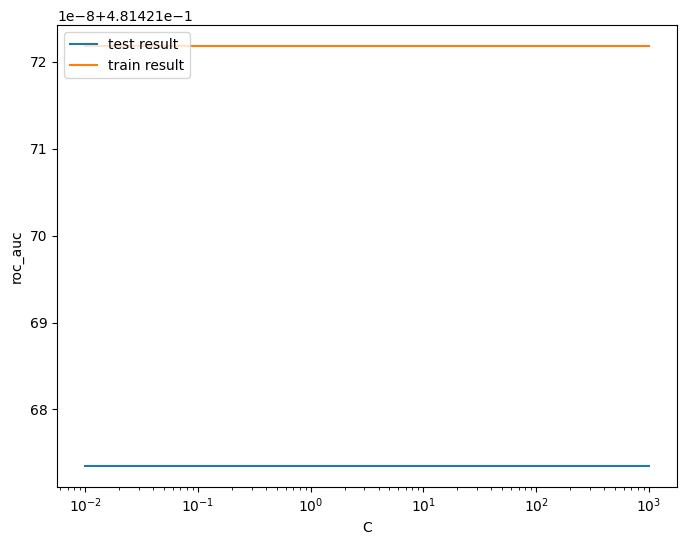

In [ ]:
# Plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

The highest test roc_auc is 0.48142167348905834 at C = 0.01


In [ ]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)


logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [ ]:

# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[442844      0]
 [442844      0]]


In [ ]:

TP = confusion[1, 1]  # true positive
TN = confusion[0, 0]  # true negatives
FP = confusion[0, 1]  # false positives
FN = confusion[1, 0]  # false negatives

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(y_train_smote, y_train_pred))


Accuracy:- 0.5
